## Linear Regression

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import linear_model
from ipywidgets import *

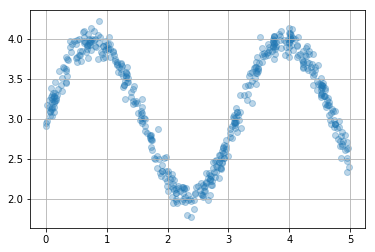

In [13]:
%matplotlib inline
np.random.seed(1)
X = np.random.random([500,1]).ravel() * 5
Y = np.sin(X * 2) + 3 + 0.1 * np.random.randn(500)
plt.scatter(X,Y, alpha=0.3)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


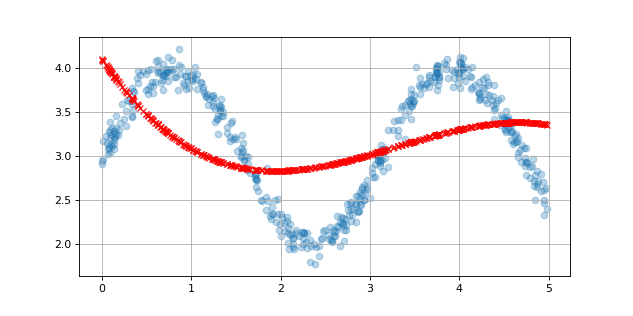

interactive(children=(IntSlider(value=3, description='n', max=15), Output()), _dom_classes=('widget-interact',…

<function __main__.update(n)>

In [16]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

n = 3
lm_lr_order_n = LinearRegression()
np.random.seed(1)
X = np.random.random([500,1]).ravel() * 5
Y = np.sin(X * 2) + 3 + 0.1 * np.random.randn(500)
X = X.reshape(-1, 1)
X_n = np.hstack([X**i for i in range(1, n+1)])
lm_lr_order_n.fit(X_n, Y)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_n[:,0], Y, alpha=0.3)
line, = ax.plot(X_n[:,0], lm_lr_order_n.predict(X_n), 'rx')
ax.grid()

def update(n):
    X_n = np.hstack([X**i for i in range(1, n+1)])
    print(X_n.shape)
    lm_lr_order_n.fit(X_n, Y)
    line.set_ydata(lm_lr_order_n.predict(X_n))
    fig.canvas.draw()

interact(update, n=widgets.IntSlider(min=0, max=15, step=1,value=3))

### Ridge

<IPython.core.display.Javascript object>


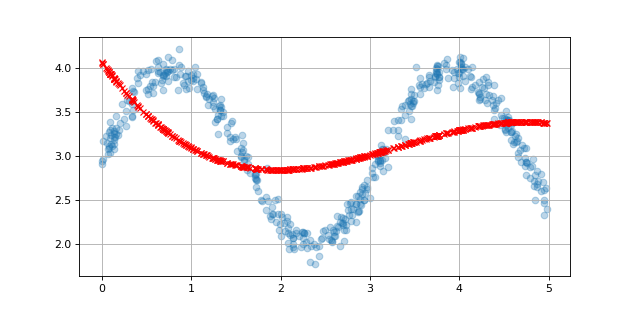

interactive(children=(IntSlider(value=3, description='n', max=15), Output()), _dom_classes=('widget-interact',…

<function __main__.update(n)>

In [21]:
%matplotlib notebook

# Data
n = 3

np.random.seed(1)
X = np.random.random([500,1]).ravel() * 5
Y = np.sin(X * 2) + 3 + 0.1 * np.random.randn(500)
X = X.reshape(-1, 1)
X_n = np.hstack([X**i for i in range(1, n+1)])

# Model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_n, Y)

# Figure
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_n[:,0], Y, alpha=0.3)
line, = ax.plot(X_n[:,0], reg.predict(X_n), 'rx')
ax.grid()

def update(n):
    X_n = np.hstack([X**i for i in range(1, n+1)])
    print(X_n.shape)
    reg.fit(X_n, Y)
    line.set_ydata(reg.predict(X_n))
    fig.canvas.draw()

interact(update, n=widgets.IntSlider(min=0, max=15, step=1,value=3))

<IPython.core.display.Javascript object>


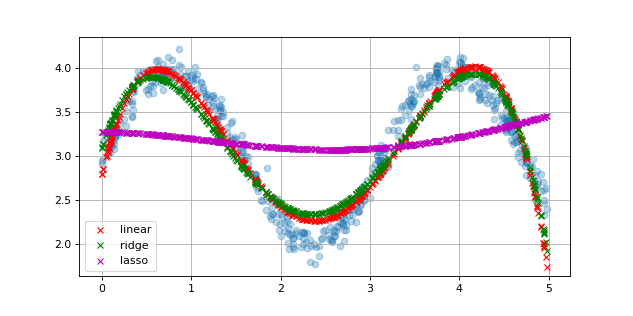

interactive(children=(IntSlider(value=3, description='n', max=15), Output()), _dom_classes=('widget-interact',…

<function __main__.update(n)>

In [28]:
%matplotlib notebook

# Data
n = 3

np.random.seed(1)
X = np.random.random([500,1]).ravel() * 5
Y = np.sin(X * 2) + 3 + 0.1 * np.random.randn(500)
X = X.reshape(-1, 1)
X_n = np.hstack([X**i for i in range(1, n+1)])

# Model
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_n, Y)
lm_lr = LinearRegression()
lm_lr.fit(X_n, Y)
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_n, Y)


# Figure
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_n[:,0], Y, alpha=0.3)
line_lr, = ax.plot(X_n[:,0], lm_lr.predict(X_n), 'rx', label='linear')
line_ridge, = ax.plot(X_n[:,0], ridge.predict(X_n), 'gx', label='ridge')
line_lasso, = ax.plot(X_n[:,0], lasso.predict(X_n), 'mx', label='lasso')
ax.legend()
ax.grid()

def update(n):
    X_n = np.hstack([X**i for i in range(1, n+1)])
    print(X_n.shape)
    lm_lr.fit(X_n, Y)
    ridge.fit(X_n, Y)
    lasso.fit(X_n, Y)
    print(f'linear regression coefs: {lm_lr.coef_}\n')
    print(f'ridge regression coefs: {ridge.coef_}\n')
    print(f'lasso regression coefs: {lasso.coef_}\n')
    line_lr.set_ydata(lm_lr.predict(X_n))
    line_ridge.set_ydata(ridge.predict(X_n))
    line_lasso.set_ydata(lasso.predict(X_n))
    fig.canvas.draw()

interact(update, n=widgets.IntSlider(min=0, max=15, step=1,value=3))